In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor([[0, 1, 2, 3, 4, 5, 6, 7.]])
x

tensor([[0., 1., 2., 3., 4., 5., 6., 7.]])

In [3]:
y = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])
y

tensor([ 1.8600,  1.3100,  0.6200,  0.3300,  0.0900, -0.6700, -1.2300, -1.3700])

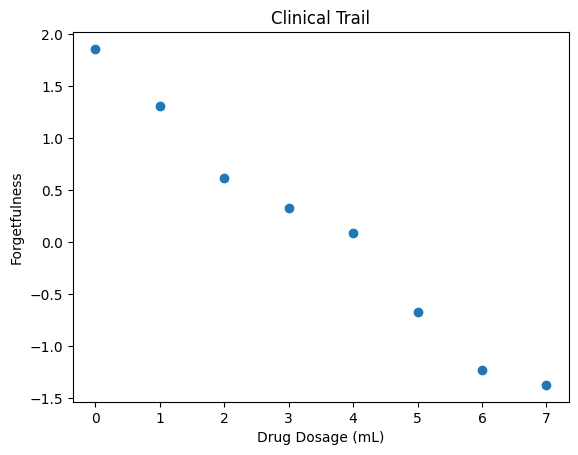

In [4]:
fig, ax = plt.subplots()
plt.title("Clinical Trail")
plt.xlabel("Drug Dosage (mL)")
plt.ylabel("Forgetfulness")
_ = ax.scatter(x, y)

In [5]:
m = torch.tensor([0.9]).requires_grad_()
m

tensor([0.9000], requires_grad=True)

In [9]:
b = torch.tensor([0.1]).requires_grad_()
b

tensor([0.1000], requires_grad=True)

In [18]:
def regression(my_x, my_m, my_b):
  return my_m*my_x + my_b

In [23]:
def regression_plot(my_x, my_y, my_m, my_b):
  fig, ax = plt.subplots()
  ax.scatter(my_x, my_y)
  x_min, x_max = ax.get_xlim()
  y_min = regression(x_min, my_m, my_b).detach().item()
  y_max = regression(x_max, my_m, my_b).detach().item()

  ax.set_xlim([x_min, x_max])
  _ = ax.plot([x_min, x_max], [y_min, y_max])

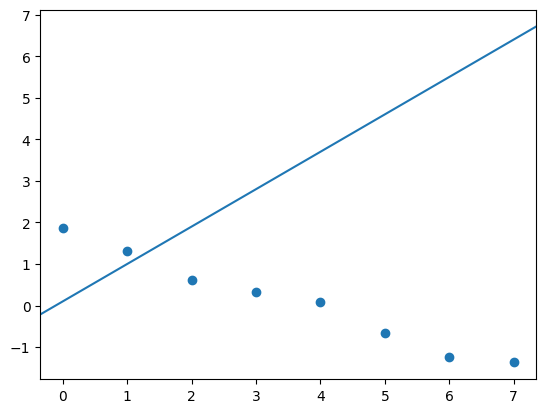

In [24]:
regression_plot(x, y, m, b)

In [25]:
yhat = regression(x, m, b)
yhat

tensor([[0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000]],
       grad_fn=<AddBackward0>)

In [29]:
def mse(my_yhat, my_y):
  sigma = torch.sum((my_yhat - my_y) ** 2)
  return sigma/len(my_y)

In [30]:
C = mse(yhat, y)
C

tensor(19.6755, grad_fn=<DivBackward0>)

In [ ]:
C.backward()

In [34]:
m.grad

tensor([36.3050])

In [37]:
b.grad

tensor([6.2650])

In [39]:
optimizer = torch.optim.SGD([m, b], lr=0.01)

In [41]:
optimizer.step()

In [43]:
m

tensor([0.1739], requires_grad=True)

In [45]:
b

tensor([-0.0253], requires_grad=True)

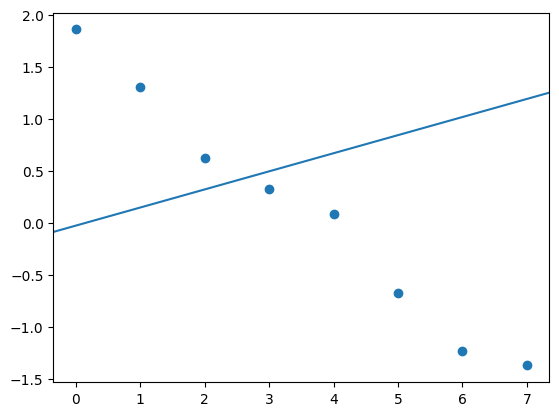

In [46]:
regression_plot(x, y, m, b)

In [48]:
C = mse(regression(x, m, b), y)
C

tensor(2.4083, grad_fn=<DivBackward0>)

In [49]:
epochs = 10000
for epoch in range(epochs):
    optimizer.zero_grad()
    yhat = regression(x, m, b)
    C = mse(yhat, y)

    C.backward()
    optimizer.step()

    print('Epoch {}, cost {}, m grad {}, b grad {}'.format(epoch, '%.3g' %
          C.item(), '%.3g' % m.grad.item(), '%.3g' % b.grad.item()))

Epoch 0, cost 2.41, m grad 10, b grad 0.932
Epoch 1, cost 1.58, m grad 6.44, b grad 0.212
Epoch 2, cost 1.24, m grad 4.17, b grad -0.243
Epoch 3, cost 1.09, m grad 2.73, b grad -0.531
Epoch 4, cost 1.03, m grad 1.81, b grad -0.711
Epoch 5, cost 0.994, m grad 1.23, b grad -0.824
Epoch 6, cost 0.974, m grad 0.855, b grad -0.893
Epoch 7, cost 0.959, m grad 0.619, b grad -0.935
Epoch 8, cost 0.947, m grad 0.468, b grad -0.96
Epoch 9, cost 0.936, m grad 0.371, b grad -0.973
Epoch 10, cost 0.925, m grad 0.309, b grad -0.98
Epoch 11, cost 0.914, m grad 0.27, b grad -0.982
Epoch 12, cost 0.904, m grad 0.244, b grad -0.981
Epoch 13, cost 0.894, m grad 0.227, b grad -0.979
Epoch 14, cost 0.884, m grad 0.216, b grad -0.975
Epoch 15, cost 0.874, m grad 0.209, b grad -0.97
Epoch 16, cost 0.864, m grad 0.204, b grad -0.966
Epoch 17, cost 0.854, m grad 0.2, b grad -0.961
Epoch 18, cost 0.845, m grad 0.197, b grad -0.955
Epoch 19, cost 0.835, m grad 0.195, b grad -0.95
Epoch 20, cost 0.826, m grad 0.1

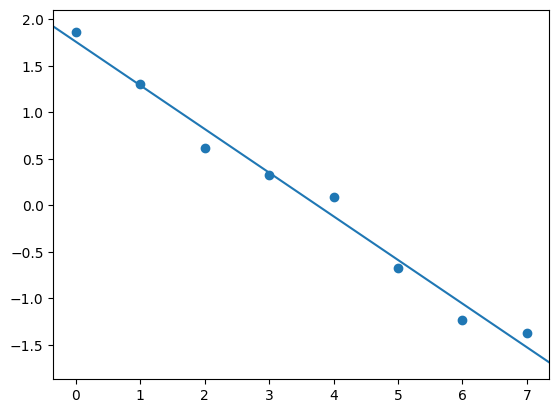

In [50]:
regression_plot(x, y, m, b)

In [51]:
m.item()

-0.4692836403846741

In [52]:
b.item()

1.759989857673645

In [53]:
def my_curve(my_x):
  return x ** 2 + 2 * x + 1

In [54]:
x = torch.tensor([2.0], requires_grad=True)

In [56]:
y = my_curve(x)

In [ ]:
y.backward()

In [67]:
slope = x.grad

In [68]:
slope.item()

6.0